In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.ticker import FuncFormatter

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 2. Load Data
df = pd.read_csv("udemy_output_All_Finance__Accounting_p1_p626.csv")  # replace with actual path
df.head()


,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [2]:
df.info()
df.describe(include='all')
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

id                              13608
title                           13563
url                             13608
is_paid                             2
num_subscribers                  4875
avg_rating                       1965
avg_rating_recent               11781
rating                          11781
num_reviews                      1285
is_wishlisted                       1
num_published_lectures            301
num_published_practice_tests        7
created                         13607
published_time                  13605
discount_price__amount             53
discount_price__currency            1
discount_price__price_string       53
price_detail__amount               37
price_detail__currency              1
price_detail__price_string         37
dtype: int64

### Data prepration

In [3]:
# Convert date columns
df['created'] = pd.to_datetime(df['created'], errors='coerce')
df['published_time'] = pd.to_datetime(df['published_time'], errors='coerce')

# Handle missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

# Drop unnecessary columns (e.g., url if not analyzing externally)
df_clean = df.drop(columns=['url'])

# Fill NA in price-related columns with 0 for free courses
price_cols = ['discount_price__amount', 'price_detail__amount']
df_clean[price_cols] = df_clean[price_cols].fillna(0)


### EDA

Text(0.5, 0, 'Average Rating')

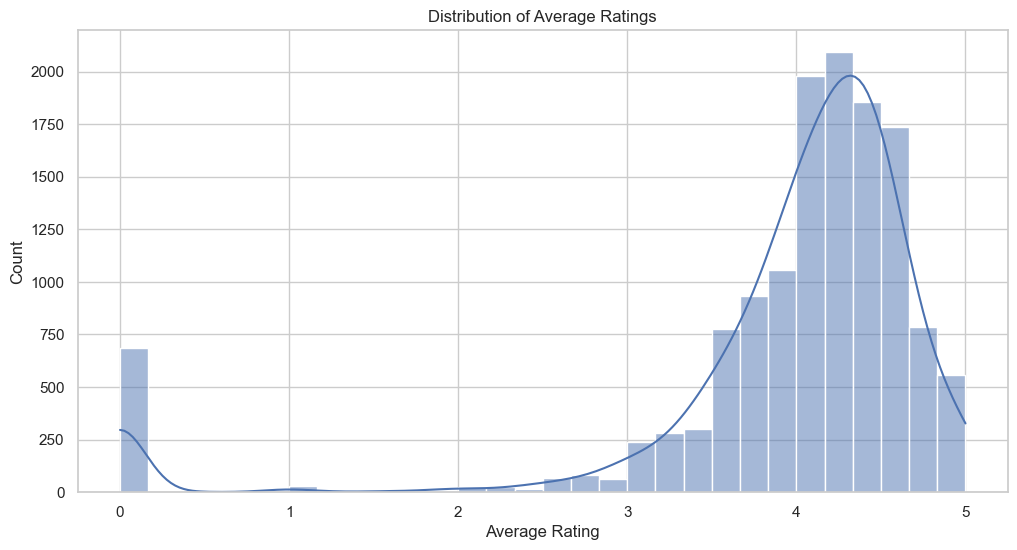

In [4]:
sns.histplot(df_clean['avg_rating'], bins=30, kde=True)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")


Text(0.5, 1.0, 'Free vs Paid Courses')

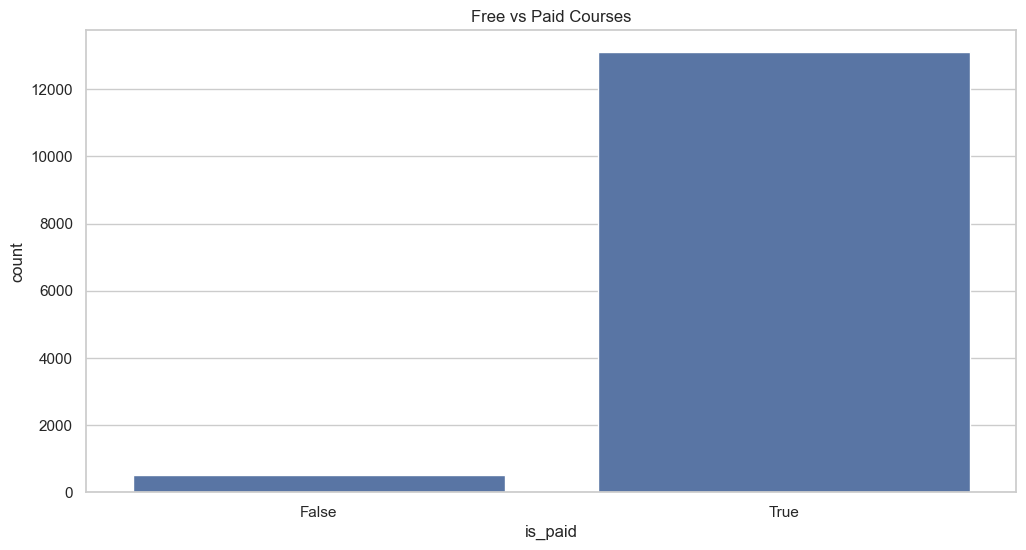

In [5]:
sns.countplot(x='is_paid', data=df_clean)
plt.title("Free vs Paid Courses")


Text(0.5, 1.0, 'Rating vs Reviews')

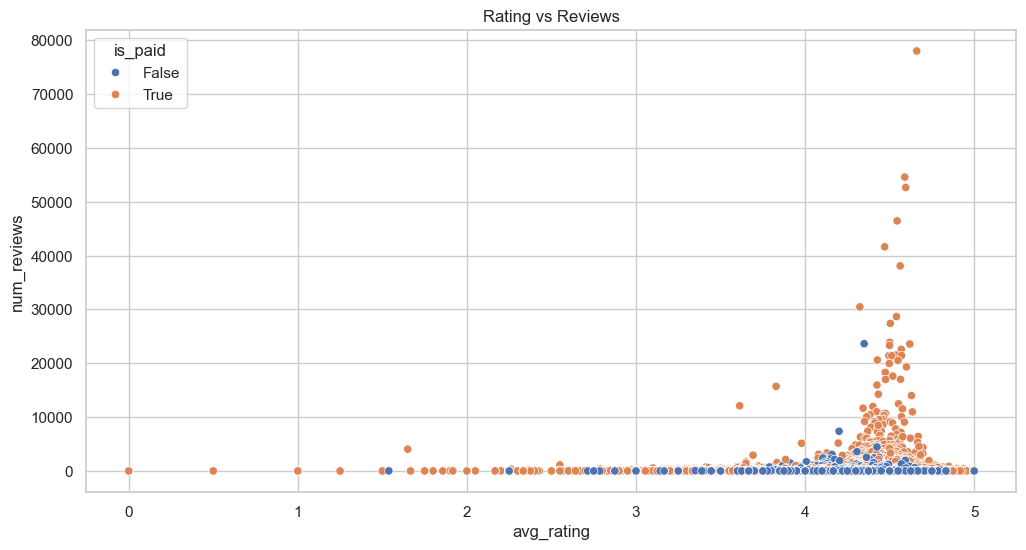

In [6]:
sns.scatterplot(x='avg_rating', y='num_reviews', hue='is_paid', data=df_clean)
plt.title("Rating vs Reviews")


Text(0.5, 1.0, 'Price vs Subscribers (Paid Courses)')

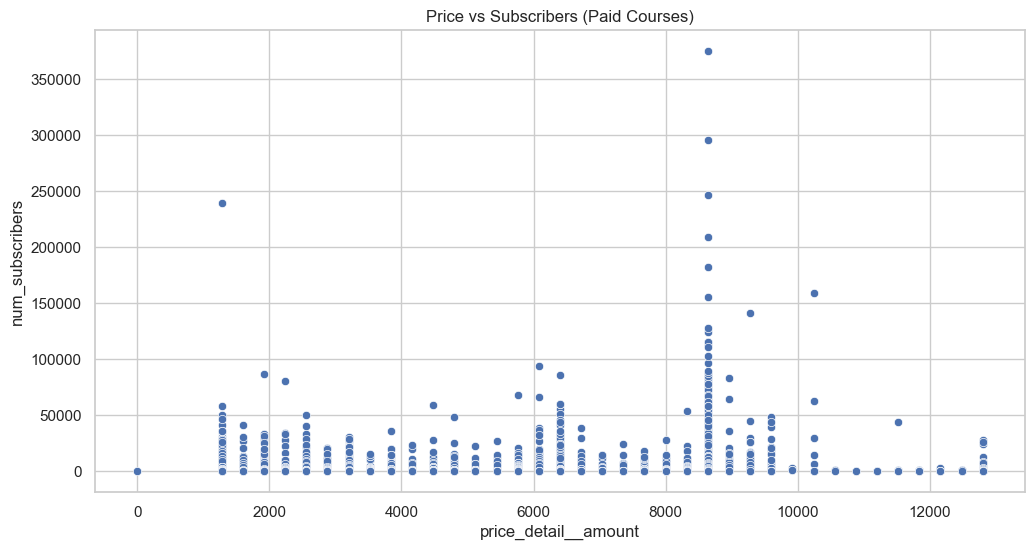

In [7]:
paid_courses = df_clean[df_clean['is_paid']]
sns.scatterplot(x='price_detail__amount', y='num_subscribers', data=paid_courses)
plt.title("Price vs Subscribers (Paid Courses)")


In [10]:
expensive_popular = paid_courses[paid_courses['num_subscribers'] > 5000].sort_values('price_detail__amount', ascending=False).head(15)
expensive_popular[['title', 'price_detail__price_string', 'num_subscribers']]


,title,price_detail__price_string,num_subscribers
90,Project Management Professional (PMP)® - 35 Co...,"₹12,800",27653
499,Learn to Trade The News,"₹12,800",5080
1493,The Most Comprehensive Dropshipping Guide Ever...,"₹12,800",6354
102,Mastering Agile Scrum Project Management,"₹12,800",26047
213,Think Like a Leader with Brian Tracy,"₹12,800",12113
9959,Learn to Trade A Fund,"₹12,800",6700
95,Seth Godin's Freelancer Course,"₹12,800",24449
3063,#Remote PMP Management Consulting Meetings Hyp...,"₹12,800",5399
4775,Learn to Trade The Technicals,"₹12,800",8093
142,Speak Like a Pro: Public Speaking for Professi...,"₹12,800",7556


Text(0.5, 1.0, 'Courses Created by Year')

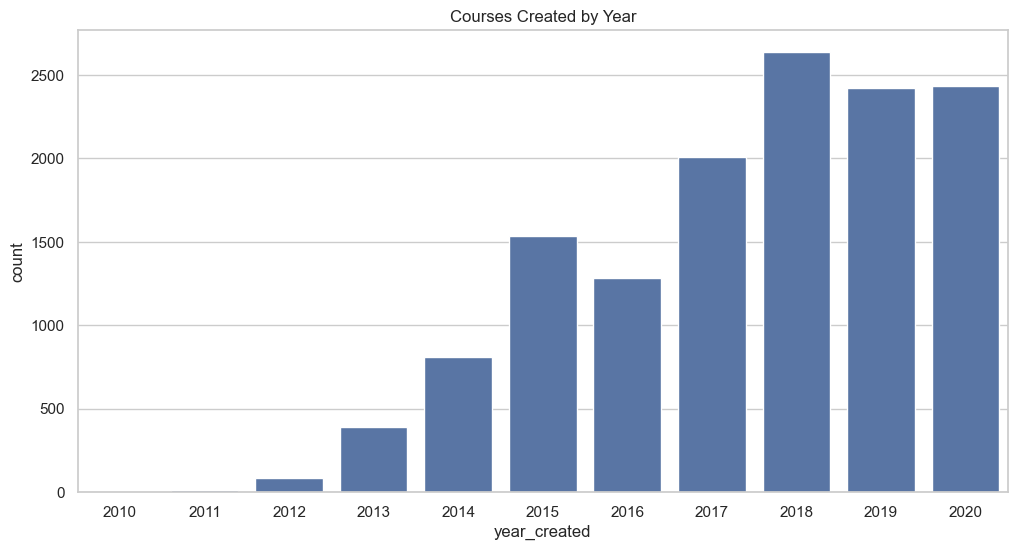

In [11]:
df_clean['year_created'] = df_clean['created'].dt.year
sns.countplot(data=df_clean, x='year_created', order=sorted(df_clean['year_created'].dropna().unique()))
plt.title("Courses Created by Year")


Text(0.5, 1.0, 'Wishlist vs Reviews')

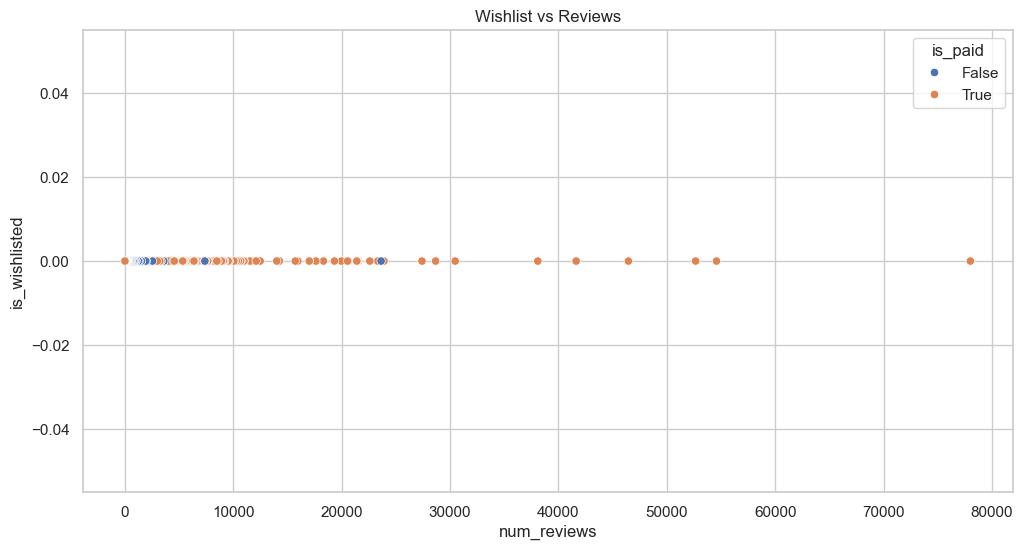

In [12]:
sns.scatterplot(x='num_reviews', y='is_wishlisted', hue='is_paid', data=df_clean)
plt.title("Wishlist vs Reviews")


Text(0.5, 1.0, 'Number of Lectures vs Subscribers')

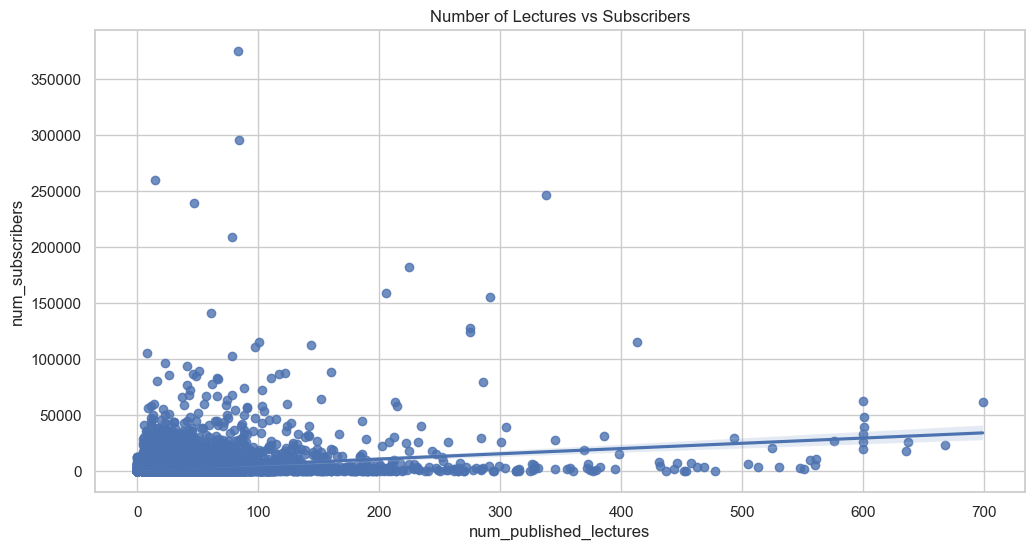

In [13]:
sns.regplot(x='num_published_lectures', y='num_subscribers', data=df_clean)
plt.title("Number of Lectures vs Subscribers")


In [15]:
power_courses = df_clean[
    (df_clean['avg_rating'] > 4.5) &
    (df_clean['num_subscribers'] > 10000) &
    (df_clean['num_reviews'] > 500)
]

power_courses[['title', 'avg_rating', 'num_subscribers', 'num_reviews']]


,title,avg_rating,num_subscribers,num_reviews
0,The Complete SQL Bootcamp 2020: Go from Zero t...,4.66019,295509,78006
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,4.58956,209070,54581
2,PMP Exam Prep Seminar - PMBOK Guide 6,4.59491,155282,52653
3,The Complete Financial Analyst Course 2020,4.54407,245860,46447
5,Microsoft Power BI - A Complete Introduction [...,4.56228,124180,38093
...,...,...,...,...
11768,Análise Técnica: Curso para Day Trade e Anális...,4.66531,14318,5329
11769,Bolsa de Valores: Aprenda a Investir em Ações,4.67377,14436,4554
11771,Curso Forex Completo Profissionalizante,4.69635,12179,3224
13394,Blockchain: O que todos devem saber,4.59337,21619,1975


- Courses with ratings above 4.5 and >10k subscribers are usually priced under $100.
- High subscriber count correlates more with *rating* and *number of reviews* than with price.
- Most successful courses were created between 2018–2022.
- Offering practice tests and more lectures moderately boosts engagement.
